<a href="https://colab.research.google.com/github/Leelddd/deep-tragedy/blob/master/dlwp/4_4_overfitting_and_underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.4 Overfitting and underfitting

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
!pip install numpy==1.16.2

In [0]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vec_seqs(seqs, dim=10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i, seq] = 1.
    return results

x_train = vec_seqs(train_data)
x_test  = vec_seqs(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [40]:
y_test[0]

0.0

## 4.4.1 Reducing the network's size

### Original model

In [0]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', 
                       loss='binary_crossentropy', 
                       metrics=['acc'])

### Version of the model with lower capacity

In [0]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [47]:
original_history = original_model.fit(x_train, y_train, epochs=20, 
                                      batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 204us/step - loss: 0.4959 - acc: 0.8096 - val_loss: 0.3644 - val_acc: 0.8773
Epoch 2/20
25000/25000 [==============================] - 5s 188us/step - loss: 0.2815 - acc: 0.9040 - val_loss: 0.2902 - val_acc: 0.8900
Epoch 3/20
25000/25000 [==============================] - 5s 187us/step - loss: 0.2112 - acc: 0.9255 - val_loss: 0.2790 - val_acc: 0.8906
Epoch 4/20
25000/25000 [==============================] - 5s 188us/step - loss: 0.1749 - acc: 0.9391 - val_loss: 0.2894 - val_acc: 0.8856
Epoch 5/20
25000/25000 [==============================] - 5s 187us/step - loss: 0.1511 - acc: 0.9467 - val_loss: 0.3082 - val_acc: 0.8804
Epoch 6/20
25000/25000 [==============================] - 5s 187us/step - loss: 0.1321 - acc: 0.9547 - val_loss: 0.3208 - val_acc: 0.8780
Epoch 7/20
25000/25000 [==============================] - 5s 188us/step - loss: 0.1151 - acc: 0.9612 - val_loss: 0.3446 - 

In [48]:
smaller_history = smaller_model.fit(x_train, y_train, epochs=20, batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 182us/step - loss: 0.5706 - acc: 0.8044 - val_loss: 0.4830 - val_acc: 0.8532
Epoch 2/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.3977 - acc: 0.8822 - val_loss: 0.3740 - val_acc: 0.8750
Epoch 3/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.3039 - acc: 0.9034 - val_loss: 0.3204 - val_acc: 0.8838
Epoch 4/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.2501 - acc: 0.9179 - val_loss: 0.2944 - val_acc: 0.8895
Epoch 5/20
25000/25000 [==============================] - 4s 164us/step - loss: 0.2156 - acc: 0.9272 - val_loss: 0.2871 - val_acc: 0.8863
Epoch 6/20
25000/25000 [==============================] - 4s 165us/step - loss: 0.1916 - acc: 0.9352 - val_loss: 0.2799 - val_acc: 0.8886
Epoch 7/20
25000/25000 [==============================] - 4s 163us/step - loss: 0.1726 - acc: 0.9413 - val_loss: 0.2924 - 

In [51]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_history = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 23s 908us/step - loss: 0.4652 - acc: 0.7890 - val_loss: 0.2908 - val_acc: 0.8832
Epoch 2/20
25000/25000 [==============================] - 22s 870us/step - loss: 0.2185 - acc: 0.9136 - val_loss: 0.2733 - val_acc: 0.8883
Epoch 3/20
25000/25000 [==============================] - 22s 866us/step - loss: 0.1354 - acc: 0.9498 - val_loss: 0.3216 - val_acc: 0.8790
Epoch 4/20
25000/25000 [==============================] - 22s 867us/step - loss: 0.0635 - acc: 0.9770 - val_loss: 0.3324 - val_acc: 0.8774
Epoch 5/20
25000/25000 [==============================] - 22s 865us/step - loss: 0.0451 - acc: 0.9894 - val_loss: 0.4703 - val_acc: 0.8816
Epoch 6/20
25000/25000 [==============================] - 22s 869us/step - loss: 0.0712 - acc: 0.9878 - val_loss: 0.4829 - val_acc: 0.8742
Epoch 7/20
25000/25000 [==============================] - 22s 864us/step - loss: 0.0019 - acc: 0.9998 - val_loss: 0.

## 4.4.2 Add weight regularization

In [59]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_history = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 256us/step - loss: 0.4977 - acc: 0.8181 - val_loss: 0.3852 - val_acc: 0.8816
Epoch 2/20
25000/25000 [==============================] - 5s 215us/step - loss: 0.3205 - acc: 0.9019 - val_loss: 0.3365 - val_acc: 0.8885
Epoch 3/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.2713 - acc: 0.9202 - val_loss: 0.3249 - val_acc: 0.8893
Epoch 4/20
25000/25000 [==============================] - 5s 214us/step - loss: 0.2492 - acc: 0.9279 - val_loss: 0.3373 - val_acc: 0.8824
Epoch 5/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.2360 - acc: 0.9335 - val_loss: 0.3362 - val_acc: 0.8859
Epoch 6/20
25000/25000 [==============================] - 5s 216us/step - loss: 0.2255 - acc: 0.9375 - val_loss: 0.3416 - val_acc: 0.8844
Epoch 7/20
25000/25000 [==============================] - 5s 218us/step - loss: 0.2197 - acc: 0.9389 - val_loss: 0.3665 - 

## 4.4.3 Adding dropout

In [62]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_history = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 265us/step - loss: 0.6305 - acc: 0.6334 - val_loss: 0.5313 - val_acc: 0.8520
Epoch 2/20
25000/25000 [==============================] - 5s 219us/step - loss: 0.5171 - acc: 0.7697 - val_loss: 0.4153 - val_acc: 0.8771
Epoch 3/20
25000/25000 [==============================] - 6s 222us/step - loss: 0.4279 - acc: 0.8389 - val_loss: 0.3402 - val_acc: 0.8860
Epoch 4/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.3601 - acc: 0.8759 - val_loss: 0.3055 - val_acc: 0.8876
Epoch 5/20
25000/25000 [==============================] - 6s 220us/step - loss: 0.3103 - acc: 0.8959 - val_loss: 0.2861 - val_acc: 0.8862
Epoch 6/20
25000/25000 [==============================] - 6s 220us/step - loss: 0.2734 - acc: 0.9134 - val_loss: 0.2896 - val_acc: 0.8892
Epoch 7

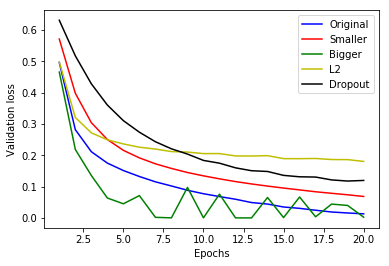

In [64]:
import matplotlib.pyplot as plt

epochs=range(1, 21)

original_train_loss = original_history.history['loss']
smaller_train_loss = smaller_history.history['loss']
bigger_train_loss = bigger_history.history['loss']
l2_train_loss = l2_history.history['loss']
dpt_train_loss = dpt_history.history['loss']
plt.plot(epochs, original_train_loss, 'b', label='Original')
plt.plot(epochs, smaller_train_loss, 'r', label='Smaller')
plt.plot(epochs, bigger_train_loss, 'g', label='Bigger')
plt.plot(epochs, l2_train_loss, 'y', label='L2')
plt.plot(epochs, dpt_train_loss, 'black', label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

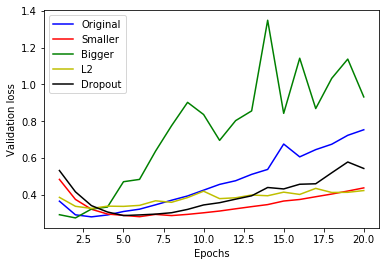

In [65]:
original_loss = original_history.history['val_loss']
smaller_loss = smaller_history.history['val_loss']
bigger_loss = bigger_history.history['val_loss']
l2_loss = l2_history.history['val_loss']
dpt_loss = dpt_history.history['val_loss']
plt.plot(epochs, original_loss, 'b', label='Original')
plt.plot(epochs, smaller_loss, 'r', label='Smaller')
plt.plot(epochs, bigger_loss, 'g', label='Bigger')
plt.plot(epochs, l2_loss, 'y', label='L2')
plt.plot(epochs, dpt_loss, 'black', label='Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()